<a href="https://colab.research.google.com/github/fxnnxc/NLP_visualization/blob/master/ipynb/7.%20NLP_PCA_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = fetch_20newsgroups()

In [30]:
X = data.data
y = data.target
len(X)
X = [X[i] for i in range(len(X)) if y[i]==1 or y[i]==2]
y = [i for i in y if i==1 or i==2]

In [29]:
y

array([7, 4, 4, ..., 3, 1, 8])

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=200, stop_words='english')
TFIDF = tfidf_vectorizer.fit_transform(X)

In [32]:
df = pd.DataFrame(X)

In [43]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(TFIDF.toarray())
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
#df['pca-three'] = pca_result[:,2]
df['y'] = y
df['label'] = df['y'].apply(lambda i: data.target_names[i])
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.03699115 0.03193806]


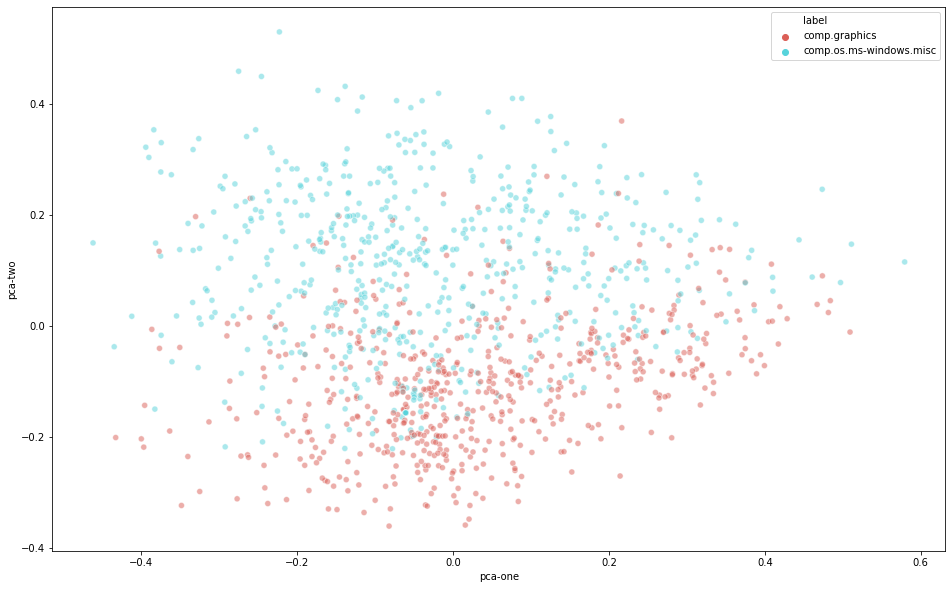

In [44]:
import seaborn as sns

rndperm = np.random.permutation(df.shape[0])

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 2),
    data=df.loc[rndperm,:],
    legend='full',
    alpha=0.5
)